In [1]:
%%capture

#inspired by code found at https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import classify, NaiveBayesClassifier
import re, string, random
import nltk

import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

Define helper functions for tokenization and lemmatization

In [2]:
def remove_noise(tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            if token in ["f.","'s", "'", "'re", '"', "...", "..", "'ll", "'ve", "'m", "....", "'d", "--", "....."]: 
                continue
            else:
                yield token

def get_strings_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)


Load all relevant articles

In [3]:
df = pd.read_csv('', encoding = "ISO-8859-1")


In [5]:
#grab the articles corresponding to each of the top authors
top_auths = df['author'].value_counts()[1:3].keys().tolist()
auth_docs = []
for i in range(0, len(top_auths)):
    temp = df.loc[df['author'] == top_auths[i]]
    docs = temp['text'].tolist()
    auth_docs.append(docs)

Build a list of cleaned tokens for each article of each author

In [6]:
#build a dictionary of stop words
stop_words = stopwords.words('english')

In [7]:
tokens = []
for i in range(0, len(top_auths)):
    tokens.append([])
    for art in auth_docs[i]:
        tokens[i].append(nltk.word_tokenize(art))

In [8]:
cleaned_tokens = []
for i in range(0, len(top_auths)):
    cleaned_tokens.append([])
    for tok in tokens[i]:
        cleaned_tokens[i].append(remove_noise(tok, stop_words))
    print(i)

0
1


In [9]:
all_words = []
for i in range(0, len(top_auths)):
    all_words.append(get_all_words(cleaned_tokens[i]))

Only consider articles from the selected authors

In [10]:
ds_auths = []
for i in range(0, len(top_auths)):
    ds_auths.append([(word_dict, top_auths[i]) for word_dict in  get_strings_for_model(cleaned_tokens[i])])

ds_full = ds_auths[0]
for i in range(1, len(top_auths)):
    ds_full = ds_full + ds_auths[i]

In [11]:
random.shuffle(ds_full)
l_ds = len(ds_full)
ds_sp = round(l_ds * 0.7)

#split data into training and test
train_data = ds_full[:ds_sp]
test_data = ds_full[ds_sp:]

In [12]:
accs = []

#run the Naive Bayesian classification model
classifier = NaiveBayesClassifier.train(train_data)
print("Accuracy is:", classify.accuracy(classifier, test_data))
print(classifier.show_most_informative_features(5))

accs.append(classify.accuracy(classifier, test_data))

Accuracy is: 0.9441860465116279
Most Informative Features
                  justin = True           Lahart : Seib,  =    112.2 : 1.0
                  barack = True           Seib,  : Lahart =     95.3 : 1.0
                  leader = True           Seib,  : Lahart =     84.2 : 1.0
              democratic = True           Seib,  : Lahart =     81.1 : 1.0
                   voter = True           Seib,  : Lahart =     72.2 : 1.0
None


Extend our classification analysis to the top 30 authors

In [13]:

for i in range (2,30):
    top_auths.append(df['author'].value_counts().keys()[i])
    temp = df.loc[df['author'] == top_auths[i]]
    docs = temp['text'].tolist()
    auth_docs.append(docs)
    tokens.append([])
    for art in auth_docs[i]:
        tokens[i].append(nltk.word_tokenize(art))
    cleaned_tokens.append([])
    for tok in tokens[i]:
        cleaned_tokens[i].append(remove_noise(tok, stop_words))
    print(i+1)
    all_words.append(get_all_words(cleaned_tokens[i]))
    ds_auths.append([(word_dict, top_auths[i]) for word_dict in  get_strings_for_model(cleaned_tokens[i])])

    ds_full = ds_full + ds_auths[i]
    
    random.shuffle(ds_full)
    l_ds = len(ds_full)
    ds_sp = round(l_ds * 0.7)

    #split data into training and test
    train_data = ds_full[:ds_sp]
    test_data = ds_full[ds_sp:]
    classifier = NaiveBayesClassifier.train(train_data)
    print("Accuracy is:", classify.accuracy(classifier, test_data))
    #print(classifier.show_most_informative_features(5))
    accs.append(classify.accuracy(classifier, test_data))


3
Accuracy is: 0.9614147909967846
4
Accuracy is: 0.9699248120300752
5
Accuracy is: 0.9690721649484536
6
Accuracy is: 0.9732620320855615
7
Accuracy is: 0.9339622641509434
8
Accuracy is: 0.9126760563380282
9
Accuracy is: 0.909323116219668
10
Accuracy is: 0.9111111111111111
11
Accuracy is: 0.9081081081081082
12
Accuracy is: 0.9095477386934674
13
Accuracy is: 0.8909774436090225
14
Accuracy is: 0.8437775816416593
15
Accuracy is: 0.8379281537176274
16
Accuracy is: 0.8366375892149088
17
Accuracy is: 0.8228614685844058
18
Accuracy is: 0.8072463768115942
19
Accuracy is: 0.7849686847599165
20
Accuracy is: 0.7757697456492637
21
Accuracy is: 0.775338928340865
22
Accuracy is: 0.7724438902743143
23
Accuracy is: 0.7932489451476793
24
Accuracy is: 0.7559836544074723
25
Accuracy is: 0.7542468856172141
26
Accuracy is: 0.7696536558548653
27
Accuracy is: 0.7728487439871726
28
Accuracy is: 0.7633905356214249
29
Accuracy is: 0.7756962025316456
30
Accuracy is: 0.76


Plot the classification accuracy as we increase the number of top authors considered

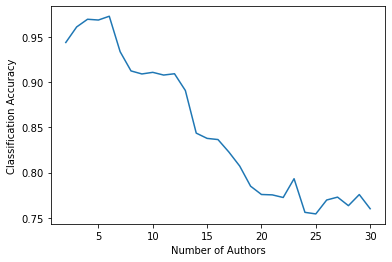

In [16]:
import matplotlib.pyplot as plt

ax = [i for i in range(2,31)]

plt.xlabel('Number of Authors')
plt.ylabel('Classification Accuracy')

plt.plot(ax, accs)

In [17]:
top_auths_back = top_auths.copy()
acc_back = accs

Extend our analysis to the top 50 authors

In [18]:
for i in range (30,50):
    top_auths.append(df['author'].value_counts().keys()[i])
    temp = df.loc[df['author'] == top_auths[i]]
    docs = temp['text'].tolist()
    auth_docs.append(docs)
    tokens.append([])
    for art in auth_docs[i]:
        tokens[i].append(nltk.word_tokenize(art))
    cleaned_tokens.append([])
    for tok in tokens[i]:
        cleaned_tokens[i].append(remove_noise(tok, stop_words))
    print(i+1)
    all_words.append(get_all_words(cleaned_tokens[i]))
    ds_auths.append([(word_dict, top_auths[i]) for word_dict in  get_strings_for_model(cleaned_tokens[i])])

    ds_full = ds_full + ds_auths[i]
    
    random.shuffle(ds_full)
    l_ds = len(ds_full)
    ds_sp = round(l_ds * 0.7)

    #split data into training and test
    train_data = ds_full[:ds_sp]
    test_data = ds_full[ds_sp:]
    classifier = NaiveBayesClassifier.train(train_data)
    print("Accuracy is:", classify.accuracy(classifier, test_data))
    #print(classifier.show_most_informative_features(5))
    accs.append(classify.accuracy(classifier, test_data))


31
Accuracy is: 0.7469879518072289
32
Accuracy is: 0.7498822421102214
33
Accuracy is: 0.748158379373849
34
Accuracy is: 0.7014858171994597
35
Accuracy is: 0.6760687527545174
36
Accuracy is: 0.6978851963746223
37
Accuracy is: 0.6617336152219874
38
Accuracy is: 0.6604477611940298
39
Accuracy is: 0.6409109394062628
40
Accuracy is: 0.6174121405750799
41
Accuracy is: 0.5262745098039215
42
Accuracy is: 0.5531996915959907
43
Accuracy is: 0.5547555892383479
44
Accuracy is: 0.5870294446515095
45
Accuracy is: 0.5586940572267058
46
Accuracy is: 0.5404332129963899
47
Accuracy is: 0.5540156361051883
48
Accuracy is: 0.5407770388519426
49
Accuracy is: 0.5465517241379311
50
Accuracy is: 0.5706521739130435


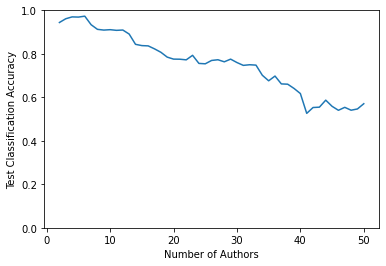

In [20]:
import matplotlib.pyplot as plt

ax = [i for i in range(2,51)]

plt.ylim(ymin=0,ymax=1)
plt.xlabel('Number of Authors')
plt.ylabel('Test Classification Accuracy')

plt.plot(ax, accs)

